In [1]:
import pandas as pd

import datetime

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

import yfinance as yf

from functools import reduce

%matplotlib inline

**Mcphy energy** [MCPHY.PA] -Frnacia - €
    
    Funded: 2008
    
    A pioneer of hydrogen technologies at the service of the energy transition, since it was founded in 2008, McPhy     has established itself among the world leaders in the production and distribution of zero-carbon hydrogen           equipment.


**Nel asa** - [NEL] - Norway - € 
    
    Funded: 1998
    
    Traducción del inglés-Nel ASA es una empresa noruega fundada en 1998 y con sede en Oslo. Nel es una empresa         global que ofrece soluciones para la producción, almacenamiento y distribución de hidrógeno a partir de fuentes     de energía renovables. 
    
**ITM power** - [ITM] - England - libra

    Funded: 2001
    
    ITM Power plc es una empresa de combustible limpio y almacenamiento de energía fundada en el Reino Unido en         2001. Diseña, fabrica e integra electrolizadores basados ​​en tecnología de membrana de intercambio de protones     para producir hidrógeno verde utilizando electricidad renovable y agua del grifo.
    
**Plug Power** -  [PLUG] - USA - $

    Funded: 1997
    
    Plug Power Inc. es una empresa estadounidense dedicada al desarrollo de sistemas de pilas de combustible de         hidrógeno que sustituyen a las baterías convencionales en equipos y vehículos alimentados por electricidad.

#### 1. Descargar datos de empresas objetivo

**Habria que hacer una conversion de moneda y que fuesesn todas Euro??**


In [2]:
start = "2018-04-01"
end = '2022-03-06'

MCPHY = yf.download('MCPHY.PA',start)
NEL = yf.download('NEL',start)
ITM = yf.download('ITM.L',start)
PLUG = yf.download('PLUG',start)

data_frames = [ITM,PLUG, MCPHY, NEL]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


**1. One year from now: After Covid**

In [4]:

tickers_list = ['ITM.L', 'PLUG', 'NEL.OL', 'MCPHY.PA']

start = '2021-05-02'
end = 0
data_AC = yf.download(tickers_list,start)['Adj Close']


print(data_AC.head())

[*********************100%***********************]  4 of 4 completed
                 ITM.L   MCPHY.PA     NEL.OL       PLUG
Date                                                   
2021-05-03         NaN  30.500000  23.920000  26.629999
2021-05-04  432.799988  28.760000  20.129999  24.600000
2021-05-05  416.600006  28.700001  19.445000  24.290001
2021-05-06  343.799988  26.719999  17.500000  22.559999
2021-05-07  390.399994  28.900000  19.450001  23.049999


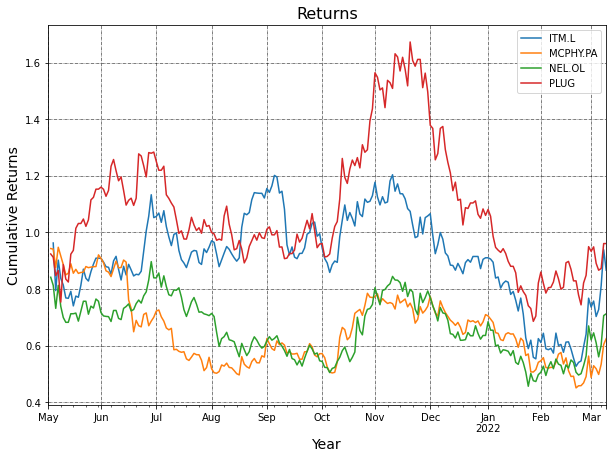

In [5]:
((data_AC.pct_change()+1).cumprod()).plot(figsize=(10, 7))
#pct_change()
#Percentage change between the current and a prior element.
#Computes the percentage change from the immediately previous row by default. This is useful in comparing the percentage of change in a time series of elements.
#cumprod()
#Return cumulative product over a DataFrame or Series axis.
#Returns a DataFrame or Series of the same size containing the cumulative product.

plt.legend()


plt.title("Returns", fontsize=16)


plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)


plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

**1.1 Correlation:**

In [6]:
retscomp = data_AC.pct_change()

corr = retscomp.corr()

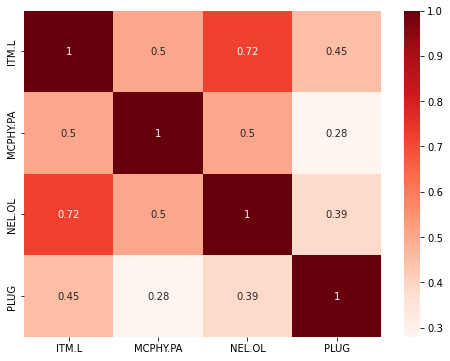

In [7]:
plt.figure(figsize=(8,6)) #15- largo y 8 de ancho
cor = corr
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

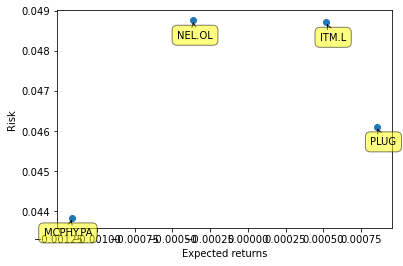

In [8]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

**2.February 23rd 2022. Russia conflict:** 24th February Russia invades Ucraina

In [9]:
tickers_list = ['ITM.L', 'PLUG', 'NEL.OL', 'MCPHY.PA']

start = '2022-01-02'
end = 0
data_Russ_Ukra = yf.download(tickers_list,start)['Adj Close']


print(data_Russ_Ukra.head())

[*********************100%***********************]  4 of 4 completed
                 ITM.L   MCPHY.PA     NEL.OL       PLUG
Date                                                   
2022-01-03         NaN  21.500000  16.370001  28.790001
2022-01-04  392.000000  21.160000  15.655000  28.150000
2022-01-05  387.200012  20.799999  15.650000  26.270000
2022-01-06  363.000000  19.690001  14.335000  25.219999
2022-01-07  364.600006  19.620001  14.400000  24.959999


In [10]:
hidro_stock_Rus_Ukr = pd.DataFrame((data_Russ_Ukra.pct_change()+1).cumprod())

In [16]:
hidro_stock_Rus_Ukr.index

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-17', '2022-01-18',
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03',
               '2022-02-04', '2022-02-07', '2022-02-08', '2022-02-09',
               '2022-02-10', '2022-02-11', '2022-02-14', '2022-02-15',
               '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-21',
               '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
               '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03',
               '2022-03-04', '2022-03-07', '2022-03-08', '2022-03-09'],
              dtype='datetime64[ns]', name='Date', freq='B')

In [18]:
hidro_stock_Rus_Ukr.to_excel('data/hidro_stock_Rus_Ukr.xlsx',index=True)

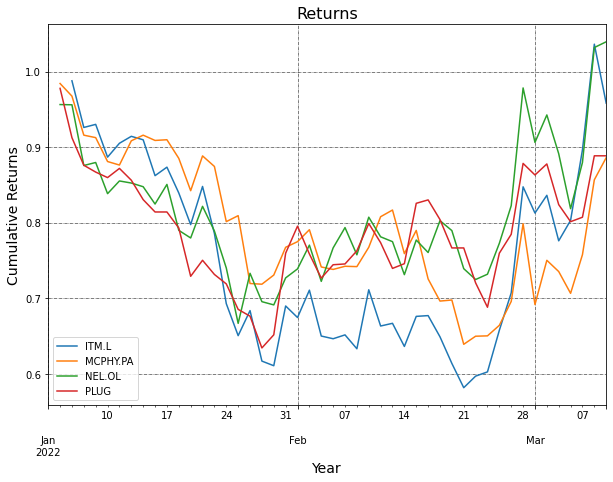

In [12]:
((data_Russ_Ukra.pct_change()+1).cumprod()).plot(figsize=(10, 7))
#pct_change()
#Percentage change between the current and a prior element.
#Computes the percentage change from the immediately previous row by default. This is useful in comparing the percentage of change in a time series of elements.
#cumprod()
#Return cumulative product over a DataFrame or Series axis.
#Returns a DataFrame or Series of the same size containing the cumulative product.

plt.legend()


plt.title("Returns", fontsize=16)


plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)


plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### El conflicto Russia - Ukrania, ha tenido impacto en todos los sectores. En el Sector del Hydrogeno verde hubo una subida.... mirar comentario de Felipe al respecto.  

**2. After Covid:**

In [13]:
tickers_list = ['ITM.L', 'PLUG', 'NEL.OL', 'MCPHY.PA']

start = '2018-01-02'
end = '2020-01-02'
data_PC = yf.download(tickers_list,start,end)['Adj Close']


print(data.head())

[*********************100%***********************]  4 of 4 completed


NameError: name 'data' is not defined

In [ ]:
((data_PC.pct_change()+1).cumprod()).plot(figsize=(10, 7))

plt.legend()


plt.title("Returns", fontsize=16)


plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)


plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

**2.2 Correlation**

In [ ]:
retscomp = data_PC.pct_change()

corr_1 = retscomp.corr()

In [ ]:
plt.figure(figsize=(8,6)) #15- largo y 8 de ancho
cor = corr_1
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### 4. Comentarios y ver si hay relacion con respecto algun evento significativo  

#### 5. (Si hay tiempo!!!)Correlacionar con precio del Petro y Gas - si hay tiempo!! 

**Key indicators to track clean energy progress on hydrogen**

Hydrogen demand in 2020 was ~90 Mt, with more than 70 Mt used as pure hydrogen and less than 20 Mt mixed with carbon-containing gases in methanol production and steel manufacturing. Almost all this demand was for refining and industrial uses. Currently, hydrogen is produced mainly from fossil fuels, resulting in close to 900Mt of CO2 emissions per year.

Clean energy progress for hydrogen can be tracked by three main indicators:

The extent to which low-carbon hydrogen production replaces conventional hydrogen in existing industrial applications and meets demand for new applications.
Demand growth in new sectors (e.g. for some transport and industrial applications, production of synthetic fuels and electricity storage), where it can help reduce CO2 emissions if production is based on low-carbon technologies.
Scale-up, cost reductions and improvements (in efficiency, lifetime or process integration) of cross-cutting technologies such as electrolysers, fuel cells and CCUS-equipped hydrogen production.


**source** https://www.iea.org/reports/hydrogen